# 深層学習: Deep Learning
ディープラーニングの例として、 全結合層のみで作った多層ニューラルネットワークを使い、</br>
手書きの数字（画像データ）から書かれた数字を予測するコードを作る

- Epoch : 学習データを試用した回数
- ETA : estimated time of arrival の略で、1エポックあたりのトレーニングにかかる時間の予測
- loss : 訓練データに対する損失
- accuracy : 訓練データに対する精度
- val_loss : 検証データに対する損失
- val_accuracy : 検証データに対する精度

Epoch 1/5
12/12 [==============================] - 0s 9ms/step - loss: 2.4174 - accuracy: 0.1363 - val_loss: 2.0960 - val_accuracy: 0.4420
Epoch 2/5
12/12 [==============================] - 0s 4ms/step - loss: 2.1194 - accuracy: 0.2553 - val_loss: 1.8939 - val_accuracy: 0.5940
Epoch 3/5
12/12 [==============================] - 0s 4ms/step - loss: 1.9276 - accuracy: 0.3523 - val_loss: 1.7172 - val_accuracy: 0.6390
Epoch 4/5
12/12 [==============================] - 0s 4ms/step - loss: 1.7434 - accuracy: 0.4432 - val_loss: 1.5620 - val_accuracy: 0.6680
Epoch 5/5
12/12 [==============================] - 0s 4ms/step - loss: 1.5626 - accuracy: 0.5395 - val_loss: 1.4171 - val_accuracy: 0.7070


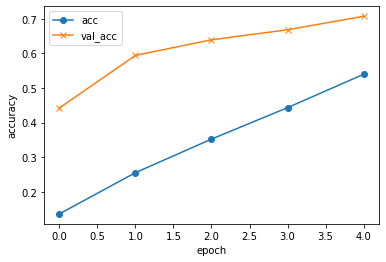

In [5]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dense, Activation, Dropout
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = tf.keras.utils.to_categorical(y_train)[:6000]
y_test = tf.keras.utils.to_categorical(y_test)[:1000]

model = tf.keras.Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = tf.keras.optimizers.SGD(lr=0.1)
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=['accuracy'])

# epochs数は5を指定
history = model.fit(X_train, y_train, batch_size=500, epochs=5, verbose=1, validation_data=(X_test, y_test))

#acc, val_accのプロット
plt.plot(history.history['accuracy'], label="acc", ls="-", marker="o")
plt.plot(history.history["val_accuracy"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()